In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import mstats

In [11]:
min_temp = pd.read_excel('../input/MinClimate.xlsx', sheet_name='Temp')
min_prec = pd.read_excel('../input/MinClimate.xlsx', sheet_name='Prec')
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')
scale_table = pd.read_excel('../output/to_send/005/scale_table.xlsx')

In [106]:
precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])
precs['Year'] = precs.index
precs = precs.reset_index(drop=True)

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_12256/3367541355.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  precs = pd.DataFrame(min_prec[min_prec['Month']<11][min_prec['Month']>7].sum()[2:], columns=['PREC'])


In [107]:
precs['Year'] = range(1916, 2019)

In [108]:
scale_table_apn_precs = scale_table.merge(precs, on='Year', how='left')

In [109]:
c1 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==1]
c2 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==2]
c3 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==3]
c4 = scale_table_apn_precs[scale_table_apn_precs['Class 4']==4]

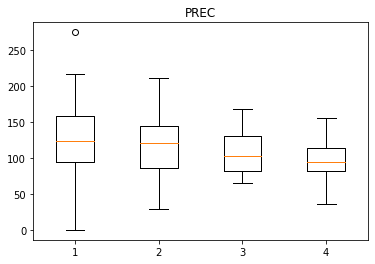

In [110]:
plt.boxplot([c1['PREC'].dropna(), c2['PREC'].dropna(), c3['PREC'].dropna(), c4['PREC'].dropna()])
plt.title('PREC')
plt.show()

In [111]:
mstats.kruskalwallis(list(c1['PREC'].dropna()), list(c2['PREC'].dropna()), list(c3['PREC'].dropna()), list(c4['PREC'].dropna()))

KruskalResult(statistic=4.139642416820706, pvalue=0.2467747259567227)

# Kraskall-Walts cumulative precs from prev year

In [114]:
min_temp_M = pd.read_excel('../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec_M = pd.read_excel('../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')

In [157]:
mean_temp = None
sum_prec = None

for week in set(min_temp_M['Week']):

    a = min_temp_M[min_temp_M['Week'] == week].mean(skipna=True)
    a['Week'] = week
    if str(mean_temp) != 'None':
        mean_temp = mean_temp.append(pd.DataFrame(a).T)
    else:
        mean_temp = pd.DataFrame(a).T
    
    a = min_prec_M[min_prec_M['Week'] == week].sum(skipna=True)
    a['Week'] = week
    if str(sum_prec) != 'None':
        sum_prec = sum_prec.append(pd.DataFrame(a).T)
    else:
        sum_prec = pd.DataFrame(a).T

In [161]:
mean_temp = mean_temp.reset_index(drop=True).drop(columns=['Month', 'Day'])
sum_prec = sum_prec.reset_index(drop=True).drop(columns=['Month', 'Day'])

In [166]:
mean_temp.T.to_excel('../output/mean_temp.xlsx', index=True)
sum_prec.T.to_excel('../output/sum_prec.xlsx', index=True)

Отсюда всё руками переделал в файл input/MinClimateWeekly.xlsx

In [167]:
temp_weekly = pd.read_excel('../input/MinClimateWeekly.xlsx', sheet_name='MEAN_TEMP')
prec_weekly = pd.read_excel('../input/MinClimateWeekly.xlsx', sheet_name='SUM_PREC')

In [168]:
temp_weekly

,Year,Class,1,2,3,4,5,6,7,8,...,33 EX,45 EX,49 EX,40,32 EX,41 EX,44,36 EX,42 EX,37 EX
0,1915,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.557143,NaN,NaN,-3.971429,NaN,NaN,NaN
1,1916,2,-24.271429,-24.014286,-24.771429,-18.357143,-13.371429,-15.614286,-20.842857,-26.400000,...,17.271429,-8.814286,-15.714286,5.057143,20.728571,0.428571,-7.400000,12.628571,-5.614286,8.857143
2,1917,2,-42.642857,-19.514286,-9.214286,-23.314286,-22.842857,-27.185714,-15.014286,-18.385714,...,18.114286,-13.485714,-16.814286,8.471429,21.514286,3.414286,-9.728571,13.542857,4.514286,12.442857
3,1918,4,-19.042857,-22.085714,-27.514286,-13.757143,-10.042857,-15.942857,-15.928571,-18.257143,...,12.585714,-9.971429,-6.128571,6.971429,17.200000,4.357143,-5.600000,12.228571,4.514286,10.714286
4,1919,2,-21.342857,-27.971429,-22.314286,-28.685714,-36.028571,-16.514286,-5.042857,-12.257143,...,18.514286,-10.828571,-14.485714,8.700000,23.157143,5.171429,-5.714286,12.457143,-0.714286,11.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2014,2,-10.314286,-12.371429,-14.400000,-14.785714,-22.157143,-24.657143,-16.042857,-6.242857,...,17.485714,-2.557143,-2.900000,7.371429,20.342857,3.642857,-0.357143,13.700000,2.271429,7.957143
100,2015,4,-8.900000,-10.800000,-5.757143,-16.685714,-15.914286,-14.200000,-6.514286,-14.957143,...,22.371429,-1.157143,-16.428571,10.057143,17.700000,3.485714,-0.885714,11.114286,-0.200000,8.942857
101,2016,1,-24.728571,-27.942857,-22.900000,-29.657143,-28.671429,-7.928571,-20.028571,-13.357143,...,15.828571,-5.971429,-6.742857,0.300000,19.957143,5.885714,-3.442857,14.214286,2.157143,11.642857
102,2017,2,-3.571429,-11.971429,-21.014286,-14.585714,-17.685714,-17.028571,-19.300000,-5.057143,...,16.571429,-6.200000,-10.571429,NaN,18.671429,1.171429,NaN,12.271429,-2.914286,16.228571
